# AgBr and AgI titrated with Cl


In [222]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-15);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%available_graphics_toolkits()
%loaded_graphics_toolkits

In [223]:

AgT=2e-6; BrT=1e-5; IT=2e-6; pH=7; pe=20.75-pH; logClT=-7:0.1:0; ClT=10.^logClT;

In [224]:
% MODEL USING PHREEQC including Br and I and Ag titrate with NaCl

for i=1:length(ClT)

minerals=[{'AgBrs'};{'AgCls'};{'AgIs'}]; totalvector=[AgT; BrT; ClT(i); IT; ClT(i)+BrT+IT]; totalnames=[{'Ag'}; {'Br'}; {'Cl'}; {'I'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Br-'};{'Cl-'};{'I-'};{'AgBr'};{'AgBr2-'};{'AgBr3-2'};{'AgBr4-3'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'};{'AgI'};{'AgI2-'};{'AgI3-2'};{'AgI4-3'}];
acid=['NaOH']; show=1; T=25;
database=['complexAgClBrIs.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Br(i)=solutionspeciesconcs(2); 
Cl(i)=solutionspeciesconcs(3);
I(i)=solutionspeciesconcs(4);
AgBr(i)=solutionspeciesconcs(5); 
AgBr2(i)=solutionspeciesconcs(6);
AgBr3(i)=solutionspeciesconcs(7);
AgBr4(i)=solutionspeciesconcs(8);
AgCl(i)=solutionspeciesconcs(9);
AgCl2(i)=solutionspeciesconcs(10);
AgCl3(i)=solutionspeciesconcs(11);
AgCl4(i)=solutionspeciesconcs(12);
AgI(i)=solutionspeciesconcs(13);
AgI2(i)=solutionspeciesconcs(14);
AgI3(i)=solutionspeciesconcs(15);
AgI4(i)=solutionspeciesconcs(16);
AgBrs(i)=solidconcs(1);
AgCls(i)=solidconcs(2);
AgIs(i)=solidconcs(3);

end

In [225]:
% MODEL USING PHREEQC including Ag and NaCl (for comparision)

for i=1:length(ClT)

minerals=[{'AgCls'}]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
acid=['NaOH']; show=1; T=25;
database=['complexAgClBrIs.dat']; 

[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);

Agsimple(i)=solutionspeciesconcs(1); 
%Cl(i)=solutionspeciesconcs(2);
%AgCl(i)=solutionspeciesconcs(3);
%AgCl2(i)=solutionspeciesconcs(4);
%AgCl3(i)=solutionspeciesconcs(5);
%AgCl4(i)=solutionspeciesconcs(6);
%AgCls(i)=solidconcs(1);

end

# plot soluble species

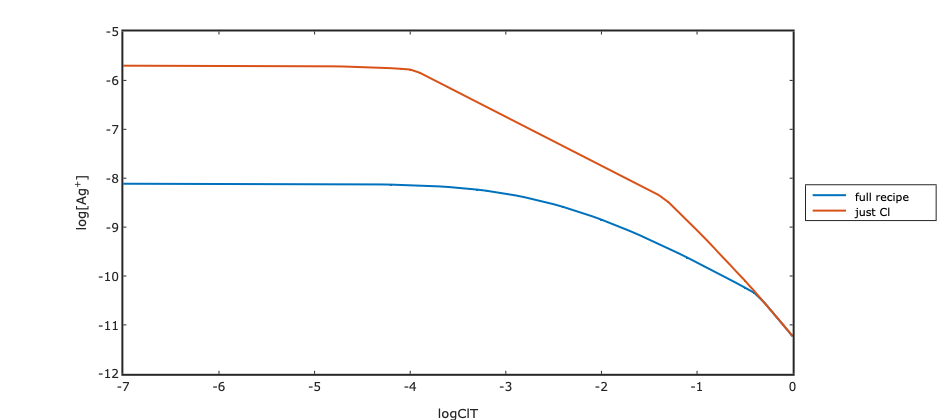

In [226]:
%h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
h=plot(logClT,log10(Ag),logClT,log10(Agsimple));
%h=plot(logBrT,log10(I));

set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logClT'); ylabel('log[Ag^+]');
legend('full recipe','just Cl','location','eastoutside')
%axis([-12 0 -40 -1])
%exportforplot=[...
%log10(Ag)' log10(Cl)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)'
%]



# plot solid species

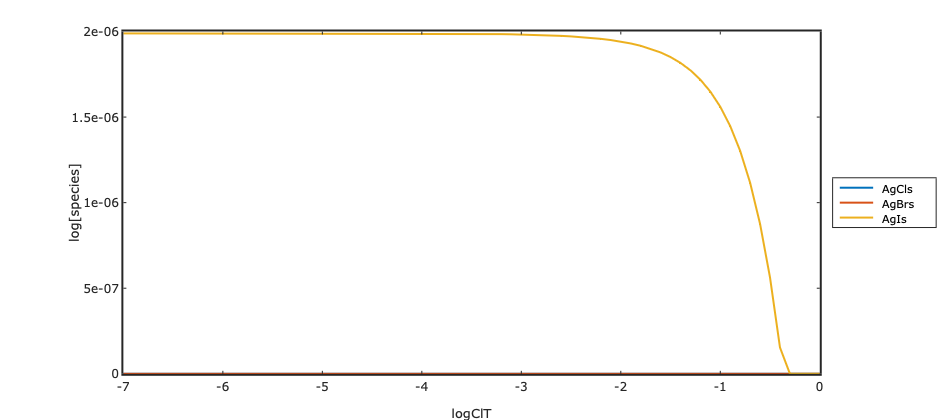

In [227]:
%h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
h=plot(logClT,AgCls,logClT,AgBrs,logClT,AgIs);
%h=plot(logBrT,log10(I));

set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logClT'); ylabel('log[species]');
legend('AgCls','AgBrs','AgIs','location','eastoutside')
%axis([-12 0 -40 -1])
%exportforplot=[...
%log10(Ag)' log10(Cl)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)'
%]
